In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

## Generating the data

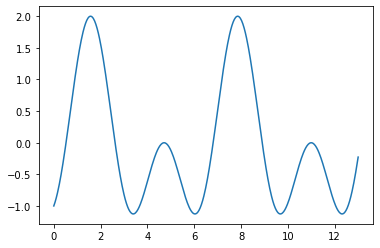

In [2]:
x = np.linspace(0.001,13,500)
y = np.sin(x)-np.cos(2*x)
plt.plot(x,y);

In [3]:
np.random.seed(1)
err = np.random.randn(500)*0.5
y_err = y + err

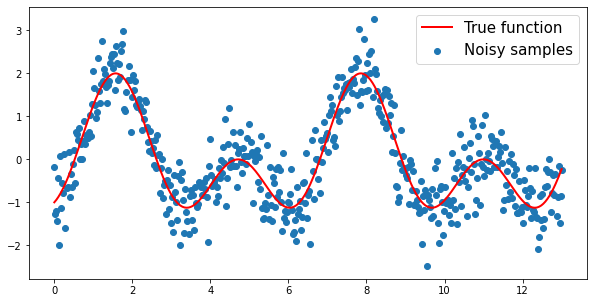

In [4]:
fig = plt.figure(figsize=(10,5))
plt.plot(x,y,color = 'r',lw = 2,label = 'True function');
plt.scatter(x,y_err, label = 'Noisy samples');
plt.legend(prop = {'size':15});

In [5]:
def X_mat(x,p):
    X = []
    for i in x:
        X.append([i**j for j in range(p+1)])
    return np.array(X)
X_mat([1,2,3],3)

array([[ 1,  1,  1,  1],
       [ 1,  2,  4,  8],
       [ 1,  3,  9, 27]])

## Linear Regression using sklearn: $15^{th}$ degree polynomial

In [6]:
lr = LinearRegression()
X = X_mat(x,15)
lr.fit(X, y_err)
lr.coef_

array([ 0.00000000e+00, -7.52733408e-03, -1.20513814e-02, -2.31231888e-02,
       -3.41647377e-02, -3.12624158e-02,  1.01896607e-03,  3.10294154e-02,
       -2.04582346e-02,  6.31206081e-03, -1.14509598e-03,  1.31192678e-04,
       -9.62852025e-06,  4.39698085e-07, -1.13852323e-08,  1.27694152e-10])

In [7]:
pred_linear = lr.predict(X)

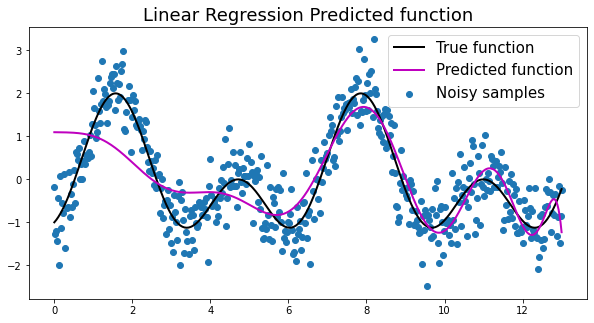

In [8]:
fig = plt.figure(figsize=(10,5))
plt.plot(x,y,color = 'k',lw = 2,label = 'True function');
plt.plot(x,pred_linear,color = 'm',lw = 2,label = 'Predicted function');
plt.scatter(x,y_err, label = 'Noisy samples');
plt.title('Linear Regression Predicted function',size = 18)
plt.legend(prop = {'size':15});

## Ridge Regression for the same data and using the $15^{th}$ degree polynomial

In [9]:
rr = Ridge(alpha=2)
rr.fit(X, y_err)
rr.coef_

array([ 0.00000000e+00,  1.02389570e+00,  8.63536546e-01,  4.33618369e-01,
       -3.55134724e-01, -5.39204884e-01,  3.01422355e-01,  4.59533041e-02,
       -7.55152343e-02,  2.69115244e-02, -5.18298934e-03,  6.18597155e-04,
       -4.71857026e-05,  2.24740899e-06, -6.10624225e-08,  7.24017250e-10])

In [10]:
pred_ridge = rr.predict(X)

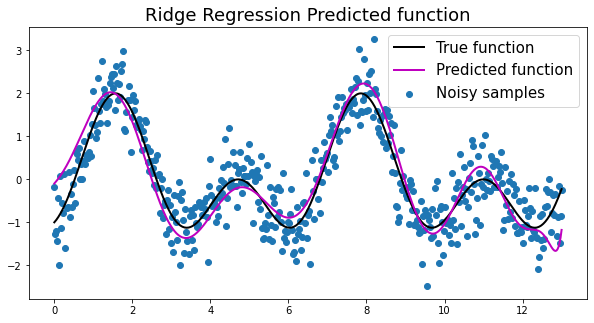

In [11]:
fig = plt.figure(figsize=(10,5))
plt.plot(x,y,color = 'k',lw = 2,label = 'True function');
plt.plot(x,pred_ridge,color = 'm',lw = 2,label = 'Predicted function');
plt.scatter(x,y_err, label = 'Noisy samples');
plt.title('Ridge Regression Predicted function',size = 18)
plt.legend(prop = {'size':15});

## Lasso Regression for the same data and using $15^{th}$ degree polynomial

In [12]:
lsr = Lasso(alpha=1)
lsr.fit(X, y_err)
lsr.coef_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.883e+02, tolerance: 6.346e-02
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -3.63851478e-04,
        2.28334249e-04, -1.08566622e-05, -1.04976080e-06, -3.99636481e-08,
       -1.72577517e-10,  1.17145721e-10,  1.23425740e-11,  8.55503916e-13,
        4.43162531e-14,  1.39241744e-15, -3.96916262e-17, -1.21788187e-17])

In [13]:
pred_lasso = lsr.predict(X)

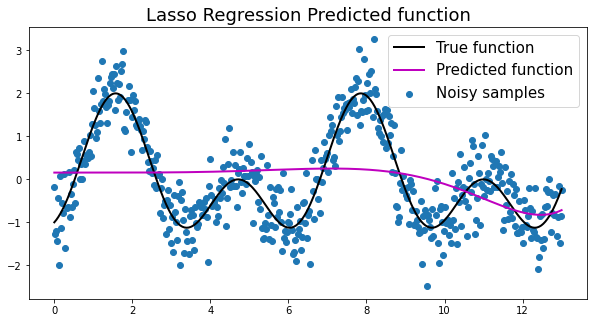

In [14]:
fig = plt.figure(figsize=(10,5))
plt.plot(x,y,color = 'k',lw = 2,label = 'True function');
plt.plot(x,pred_lasso,color = 'm',lw = 2,label = 'Predicted function');
plt.scatter(x,y_err, label = 'Noisy samples');
plt.title('Lasso Regression Predicted function',size = 18)
plt.legend(prop = {'size':15});

## Changing features for Lasso

In [15]:
def X_mat2(x):
    X = []
    for i in x:
        X.append([1, np.sin(i), np.cos(2*i)])
    return np.array(X)
X_mat2([1,2,3])

array([[ 1.        ,  0.84147098, -0.41614684],
       [ 1.        ,  0.90929743, -0.65364362],
       [ 1.        ,  0.14112001,  0.96017029]])

In [16]:
X = X_mat2(x)

In [17]:
lsr = Lasso(alpha=1.0e-9)
lsr.fit(X, y_err)
lsr.coef_

array([ 0.        ,  0.9803907 , -1.06177966])

In [18]:
pred_lasso = lsr.predict(X)

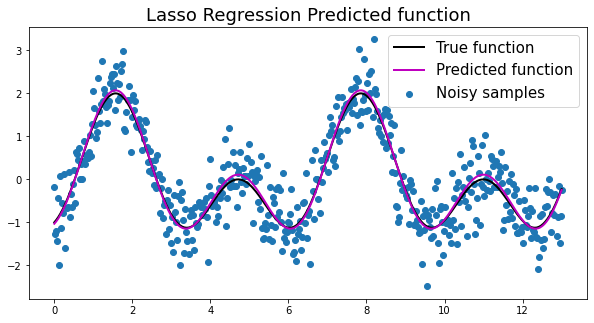

In [19]:
fig = plt.figure(figsize=(10,5))
plt.plot(x,y,color = 'k',lw = 2,label = 'True function');
plt.plot(x,pred_lasso,color = 'm',lw = 2,label = 'Predicted function');
plt.scatter(x,y_err, label = 'Noisy samples');
plt.title('Lasso Regression Predicted function',size = 18)
plt.legend(prop = {'size':15});

Hence given features which are close to good, Lasso performs exceptionally well !!

## Hence we need feature engineering !!